In [ ]:
import pandas as pd

In [ ]:
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [ ]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transaction_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [ ]:
transaction_data['DATE'].dtype

dtype('int64')

In [ ]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [ ]:
transaction_data['DATE'].head()

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18


In [ ]:
# Remove rows where product name contains 'salsa' (case-insensitive)
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.lower().str.contains('salsa')]

In [ ]:
transaction_data['PROD_NAME'].str.contains('salsa', case=False).sum()

np.int64(0)

In [ ]:
transaction_data['PROD_QTY'].describe()

,PROD_QTY
count,246742.000000
mean,1.908062
std,0.659831
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,200.000000


In [ ]:
transaction_data[transaction_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]

In [ ]:
transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [ ]:
# Extract numbers from product name to get PACK_SIZE
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)

In [ ]:
transaction_data['PACK_SIZE'].value_counts().sort_index()

,count
PACK_SIZE,
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,40203
160,2970
165,15297


In [ ]:
# Extract the first word (brand name) from product name
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [ ]:
transaction_data['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


In [ ]:
# Standardize brand names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({
    'Red': 'RRD',
    'Infzns': 'Infuzions',
    'Dorito': 'Doritos',
    'Grain': 'GrainWaves'
})

In [ ]:
transaction_data['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,27390
Doritos,25224
Pringles,25102
RRD,16321
Infuzions,14201
Thins,14075
WW,10320
Cobs,9693


In [ ]:
customer_data.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
# Merge transaction data with customer data on loyalty card number
merged_data = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')

In [ ]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
merged_data.shape

(246740, 12)

In [ ]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and sum sales
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort by sales (optional)
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

sales_by_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


In [ ]:
!pip install seaborn

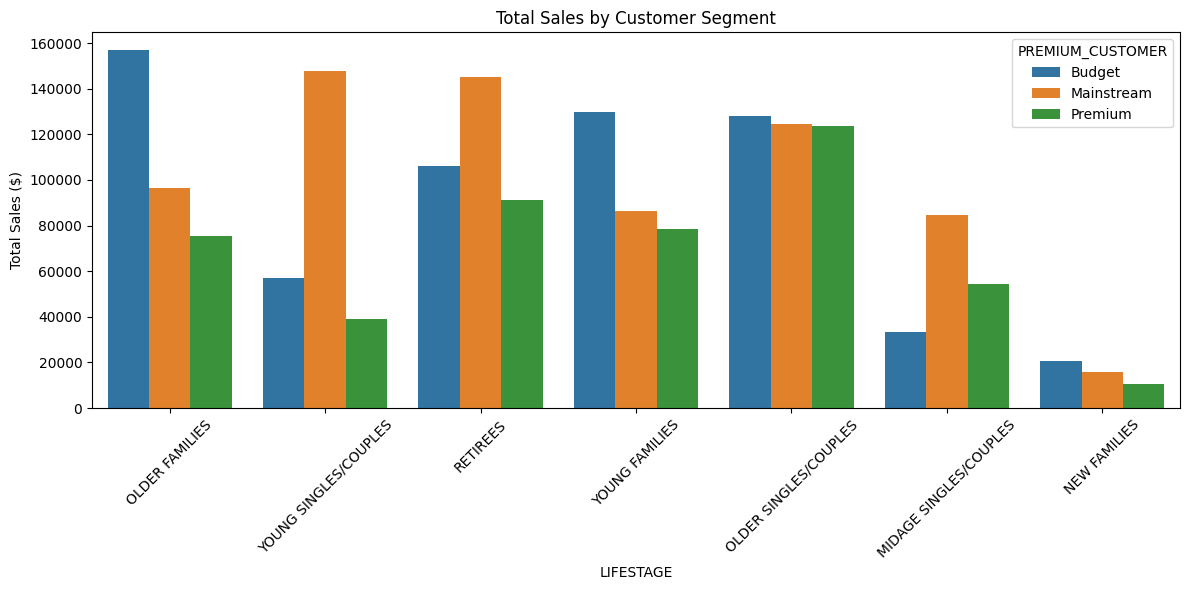

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

In [ ]:
units_data = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
units_data.head()

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060


In [ ]:
customer_counts = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_counts.head()

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830


In [ ]:
avg_units = units_data.merge(customer_counts, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])

In [ ]:
avg_units.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOTAL_UNITS', 'NUM_CUSTOMERS']


In [ ]:
avg_units['AVG_UNITS'] = avg_units['TOTAL_UNITS'] / avg_units['NUM_CUSTOMERS']

In [ ]:
avg_units.sort_values(by='AVG_UNITS', ascending=False)


,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL_UNITS,NUM_CUSTOMERS,AVG_UNITS
7,OLDER FAMILIES,Mainstream,25804,2788,9.255380
6,OLDER FAMILIES,Budget,41853,4611,9.076773
8,OLDER FAMILIES,Premium,20239,2231,9.071717
15,YOUNG FAMILIES,Budget,34482,3953,8.722995
17,YOUNG FAMILIES,Premium,20901,2398,8.716013
16,YOUNG FAMILIES,Mainstream,23194,2685,8.638361
9,OLDER SINGLES/COUPLES,Budget,32883,4849,6.781398
11,OLDER SINGLES/COUPLES,Premium,31695,4682,6.769543
10,OLDER SINGLES/COUPLES,Mainstream,32607,4858,6.712021
1,MIDAGE SINGLES/COUPLES,Mainstream,21213,3298,6.432080


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

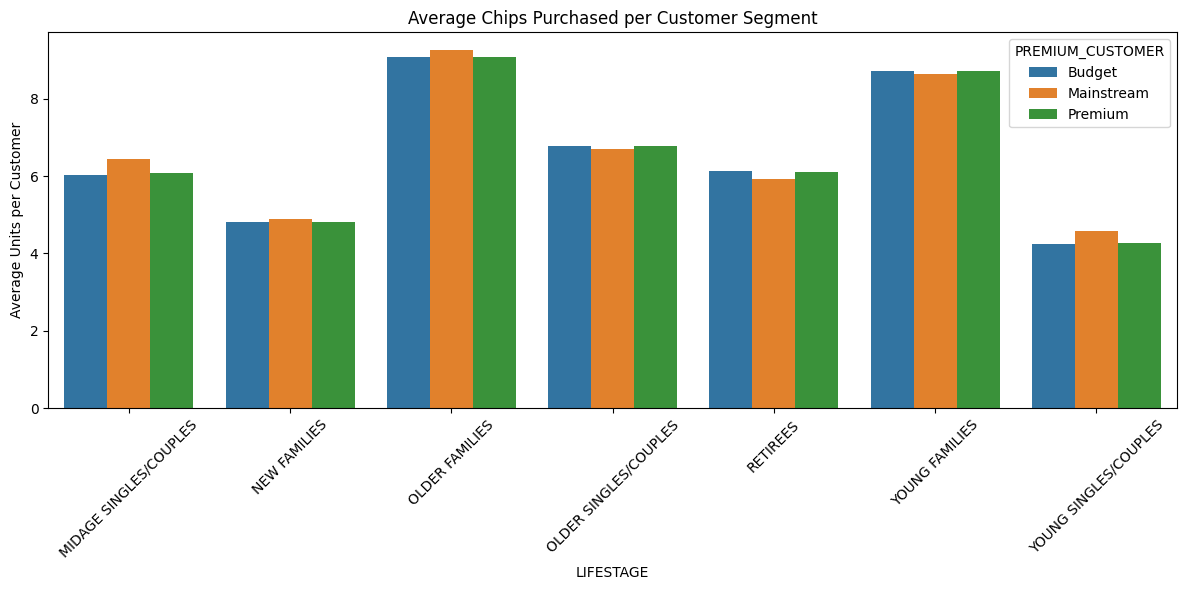

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')
plt.title('Average Chips Purchased per Customer Segment')
plt.xticks(rotation=45)
plt.ylabel('Average Units per Customer')
plt.tight_layout()
plt.show()

In [ ]:
merged_data['PRICE_PER_UNIT'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

In [ ]:
avg_price = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().reset_index()
avg_price.sort_values(by='PRICE_PER_UNIT', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_UNIT
19,YOUNG SINGLES/COUPLES,Mainstream,4.065642
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
12,RETIREES,Budget,3.924404
14,RETIREES,Premium,3.920942
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
11,OLDER SINGLES/COUPLES,Premium,3.893182
9,OLDER SINGLES/COUPLES,Budget,3.882096
5,NEW FAMILIES,Premium,3.872110
13,RETIREES,Mainstream,3.844294


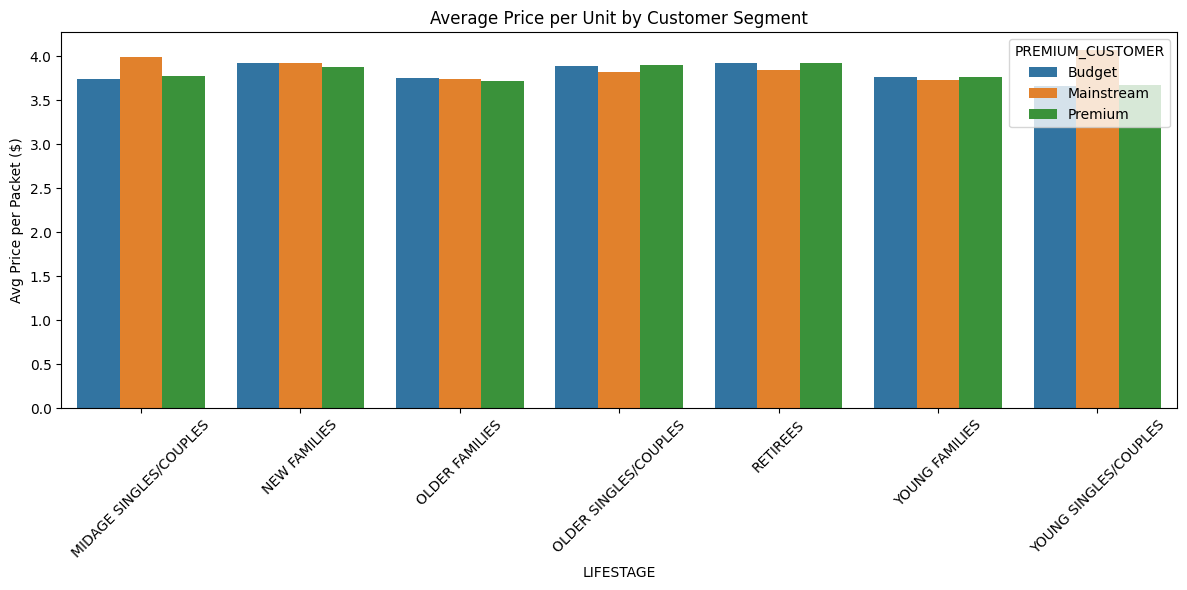

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')
plt.title("Average Price per Unit by Customer Segment")
plt.xticks(rotation=45)
plt.ylabel("Avg Price per Packet ($)")
plt.tight_layout()
plt.show()

In [ ]:
target_segment = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

In [ ]:
target_segment['BRAND'].value_counts().head(5)

,count
BRAND,
Kettle,3844
Doritos,2379
Pringles,2315
Smiths,1790
Infuzions,1250


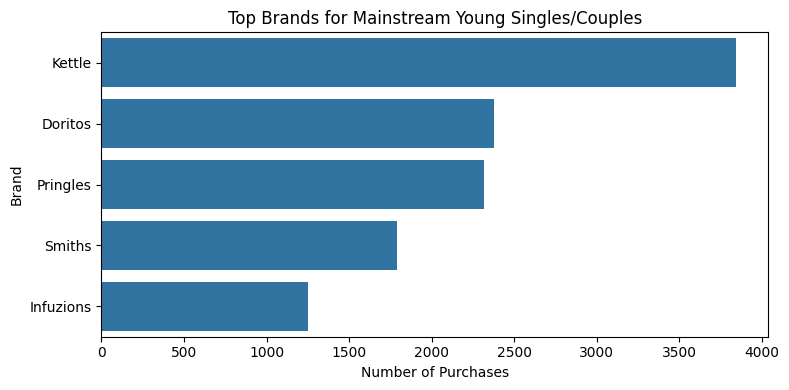

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=target_segment, y='BRAND', order=target_segment['BRAND'].value_counts().head(5).index)
plt.title("Top Brands for Mainstream Young Singles/Couples")
plt.xlabel("Number of Purchases")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [ ]:
target_segment['PACK_SIZE'].value_counts().sort_index()

,count
PACK_SIZE,
70,63
90,128
110,2051
125,59
134,2315
135,290
150,3080
160,128
165,1102


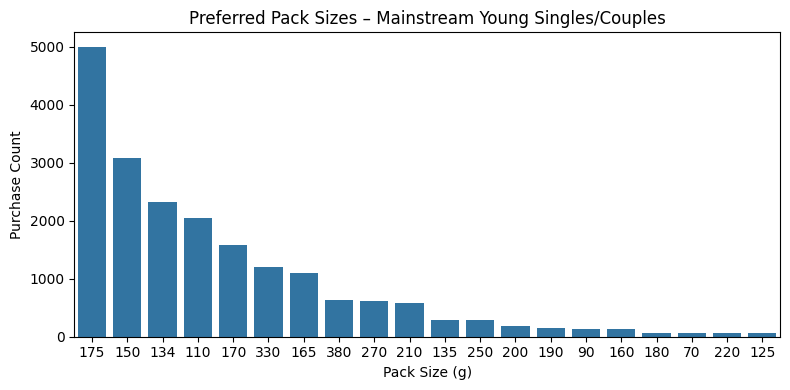

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=target_segment, x='PACK_SIZE', order=target_segment['PACK_SIZE'].value_counts().index)
plt.title("Preferred Pack Sizes – Mainstream Young Singles/Couples")
plt.ylabel("Purchase Count")
plt.xlabel("Pack Size (g)")
plt.tight_layout()
plt.show()

In [ ]:
merged_data.to_csv("QVI_cleaned_merged_data.csv", index=False)

HERE ARE ALL THE CHARTS


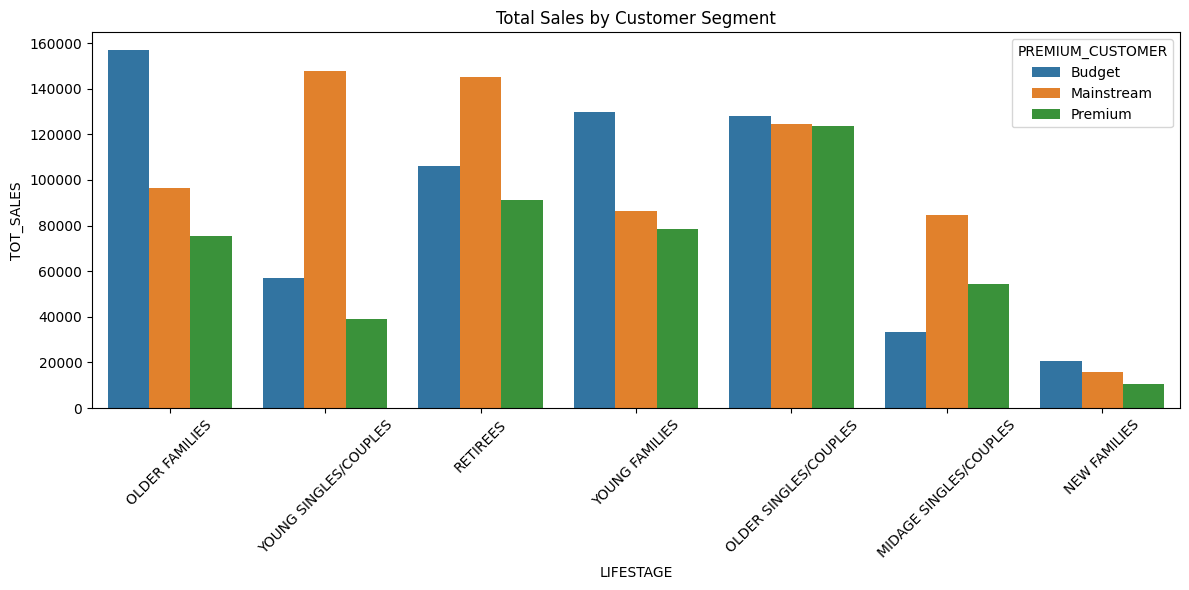

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("total_sales_by_segment.png")  # 💾 Save this chart as PNG
plt.show()

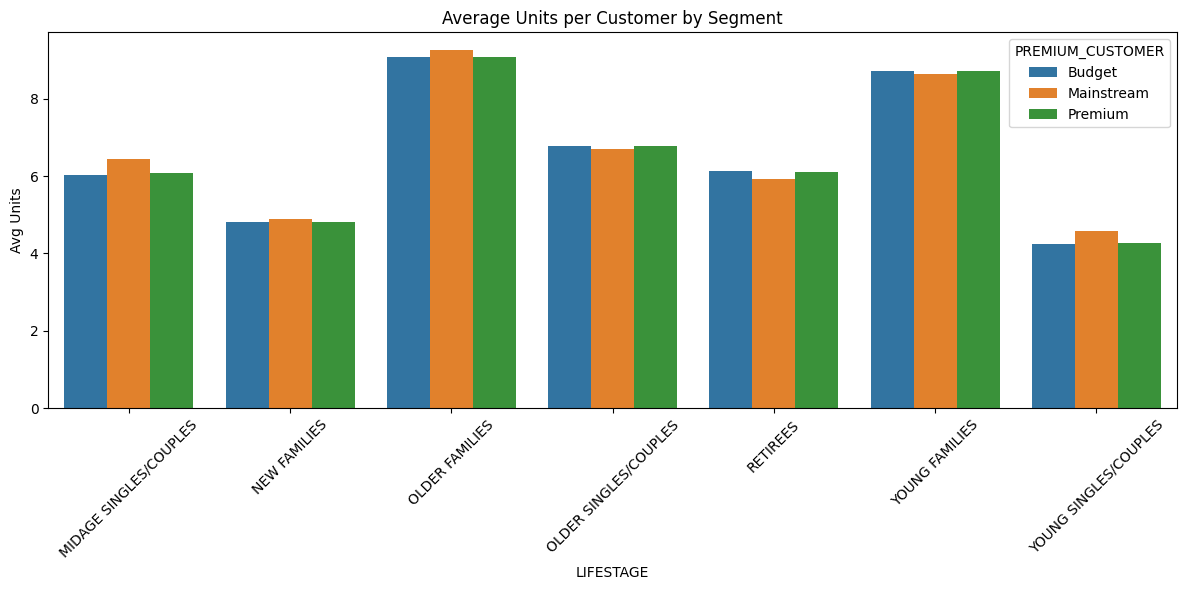

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')
plt.title("Average Units per Customer by Segment")
plt.xticks(rotation=45)
plt.ylabel("Avg Units")
plt.tight_layout()
plt.savefig("avg_units_per_customer.png")  # 💾 Save this chart
plt.show()


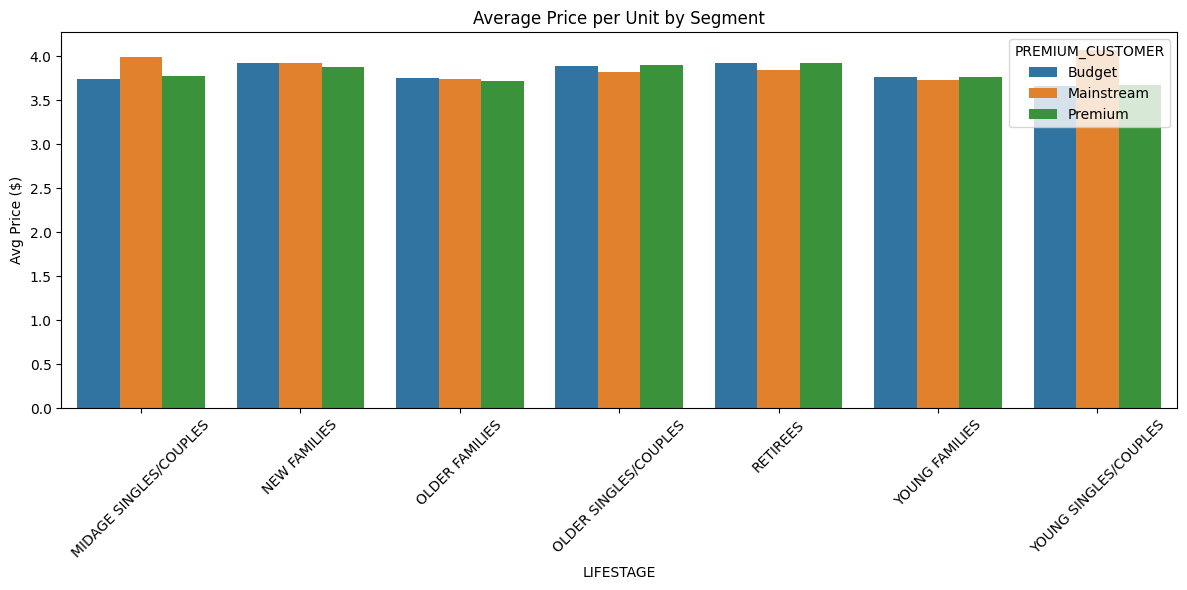

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')
plt.title("Average Price per Unit by Segment")
plt.xticks(rotation=45)
plt.ylabel("Avg Price ($)")
plt.tight_layout()
plt.savefig("avg_price_per_unit.png")  # 💾 Save this chart
plt.show()


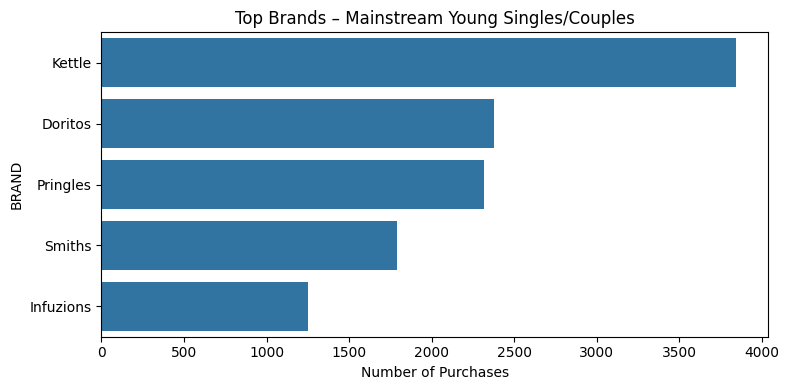

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=target_segment, y='BRAND', order=target_segment['BRAND'].value_counts().head(5).index)
plt.title("Top Brands – Mainstream Young Singles/Couples")
plt.xlabel("Number of Purchases")
plt.tight_layout()
plt.savefig("top_brands_young_singles.png")  # 💾 Save this chart
plt.show()


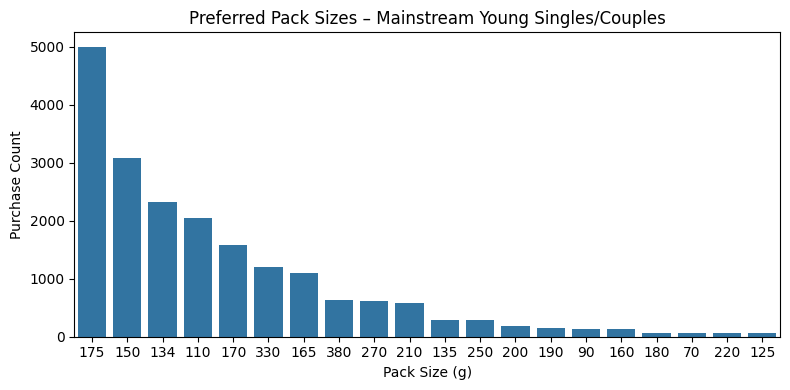

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=target_segment, x='PACK_SIZE', order=target_segment['PACK_SIZE'].value_counts().index)
plt.title("Preferred Pack Sizes – Mainstream Young Singles/Couples")
plt.ylabel("Purchase Count")
plt.xlabel("Pack Size (g)")
plt.tight_layout()
plt.savefig("preferred_pack_sizes_young_singles.png")  # 💾 Save this chart
plt.show()
